# Step 2: rough assignment of cell types

In [1]:
.libPaths(new=c('/home/jthomp02/R410_manual', '/home/jthomp02/miniconda3/envs/Rv4_1/lib/R/library'))
suppressPackageStartupMessages({
    library(Seurat)
    library(ggplot2)
    library(dplyr)
    library(here)
})

In [ ]:
obs <- read.csv(here("processed-data","SH_obs_JTfilters-2500-60000.csv"), header = T, sep = ",", row.names= 1)
var <- read.csv(here("processed-data","SH_var_JTfilters-2500-60000.csv"), header = T, sep = ",")
counts <- read.csv(here("processed-data","SH_counts_raw_JTfilters-2500-60000.csv"), header = F, sep = ",")

rownames(counts) = var$gene_symbol
colnames(counts) = rownames(obs)

sro <- CreateSeuratObject(counts, meta.data=as.data.frame(obs))

In [ ]:
sro_mt <- SCTransform(sro, vars.to.regress="mt_frac")

In [4]:
sro_mt <- RunPCA(object = sro_mt)
sro_mt <- FindNeighbors(object = sro_mt, dims= 1:30)
sro_mt <- FindClusters(object = sro_mt, resolution=1, algorithm=2)

PC_ 1 
Positive:  Cst3, Apoe, Ptn, Aldoc, Plpp3, Slc1a3, Clu, Atp1a2, Slc1a2, Htra1 
	   Glul, Id3, Gpr37l1, Pla2g7, Hopx, Dbi, Mt1, Gja1, Bcan, Aqp4 
	   Cspg5, Ptprz1, Ntsr2, Sparcl1, Cldn10, Mfge8, Sparc, Prdx6, Id4, Fabp7 
Negative:  Nrgn, Igfbpl1, Meg3, Sox11, C1ql3, Olfm1, Tmsb10, Calb2, Stmn1, Rtn1 
	   Calb1, Chn1, Nefl, Stmn2, Ppp3ca, Pcp4, Tubb3, Camk2b, Neurod1, Snca 
	   Camk2a, Map1b, Ncdn, Cplx2, Calm2, Bhlhe22, Atp1b1, Syt1, Sox4, Grin2a 
PC_ 2 
Positive:  Aldoc, Plpp3, Slc1a3, Clu, Ptn, Slc1a2, Atp1a2, Htra1, Gpr37l1, Pla2g7 
	   Mt1, Hopx, Cspg5, Bcan, Gja1, Ptprz1, Aqp4, Dbi, Apoe, Sparcl1 
	   Ntsr2, Cldn10, Id3, Prdx6, Id4, Fabp7, Mt3, Mfge8, Ttyh1, Mt2 
Negative:  Tyrobp, C1qa, C1qb, C1qc, Ctss, Csf1r, Fcer1g, Laptm5, Cx3cr1, Ly86 
	   Trem2, Hexb, Fcrls, Sparc, P2ry12, Rgs10, Gpr34, Selplg, Siglech, Ctsd 
	   Lgmn, Olfml3, Selenop, Rnase4, Tmem119, Aif1, Fcgr3, Unc93b1, Ltc4s, Cyba 
PC_ 3 
Positive:  Nrgn, C1ql3, Calb1, Atp1b1, Chn1, Nefl, Camk2n1, Olfm1, Meg3, Ca

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19326
Number of edges: 591095

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8943
Number of communities: 28
Elapsed time: 2 seconds


In [5]:
truncfeaturelist <- c("C1qb","C1qa","Cx3cr1", # microglia
                      "Vtn","Pdgfrb", # mural
                      "Col4a2","Pecam1", # endothelial
                      "Hopx", # astrocytes & RGL
                      "Aqp4","Aldh1l1", # astrocytes
                      "Mog", # myelin producing
                      "Plp1","Olig1", # olig
                      "Olig2","Pdgfra", # olig precursor
                      "Hist1h2ap","Hist1h1b","Mki67", "Cenpf","Hmgb2",# neuroprogenitor
                      "Eomes","Dcx","Tubb3","Gap43","Stmn2","Calb2","Nav1","Gal", #neuroblasts
                      "Fxyd7",# immature GC
                      "Hpca","Nefl","Calb1", # neurons (Calb1)
                      "Bdnf","Tdo2","Ntng1","Nefm",
                      "Reln","Cacna2d2" # cajal-retzius
                    )

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


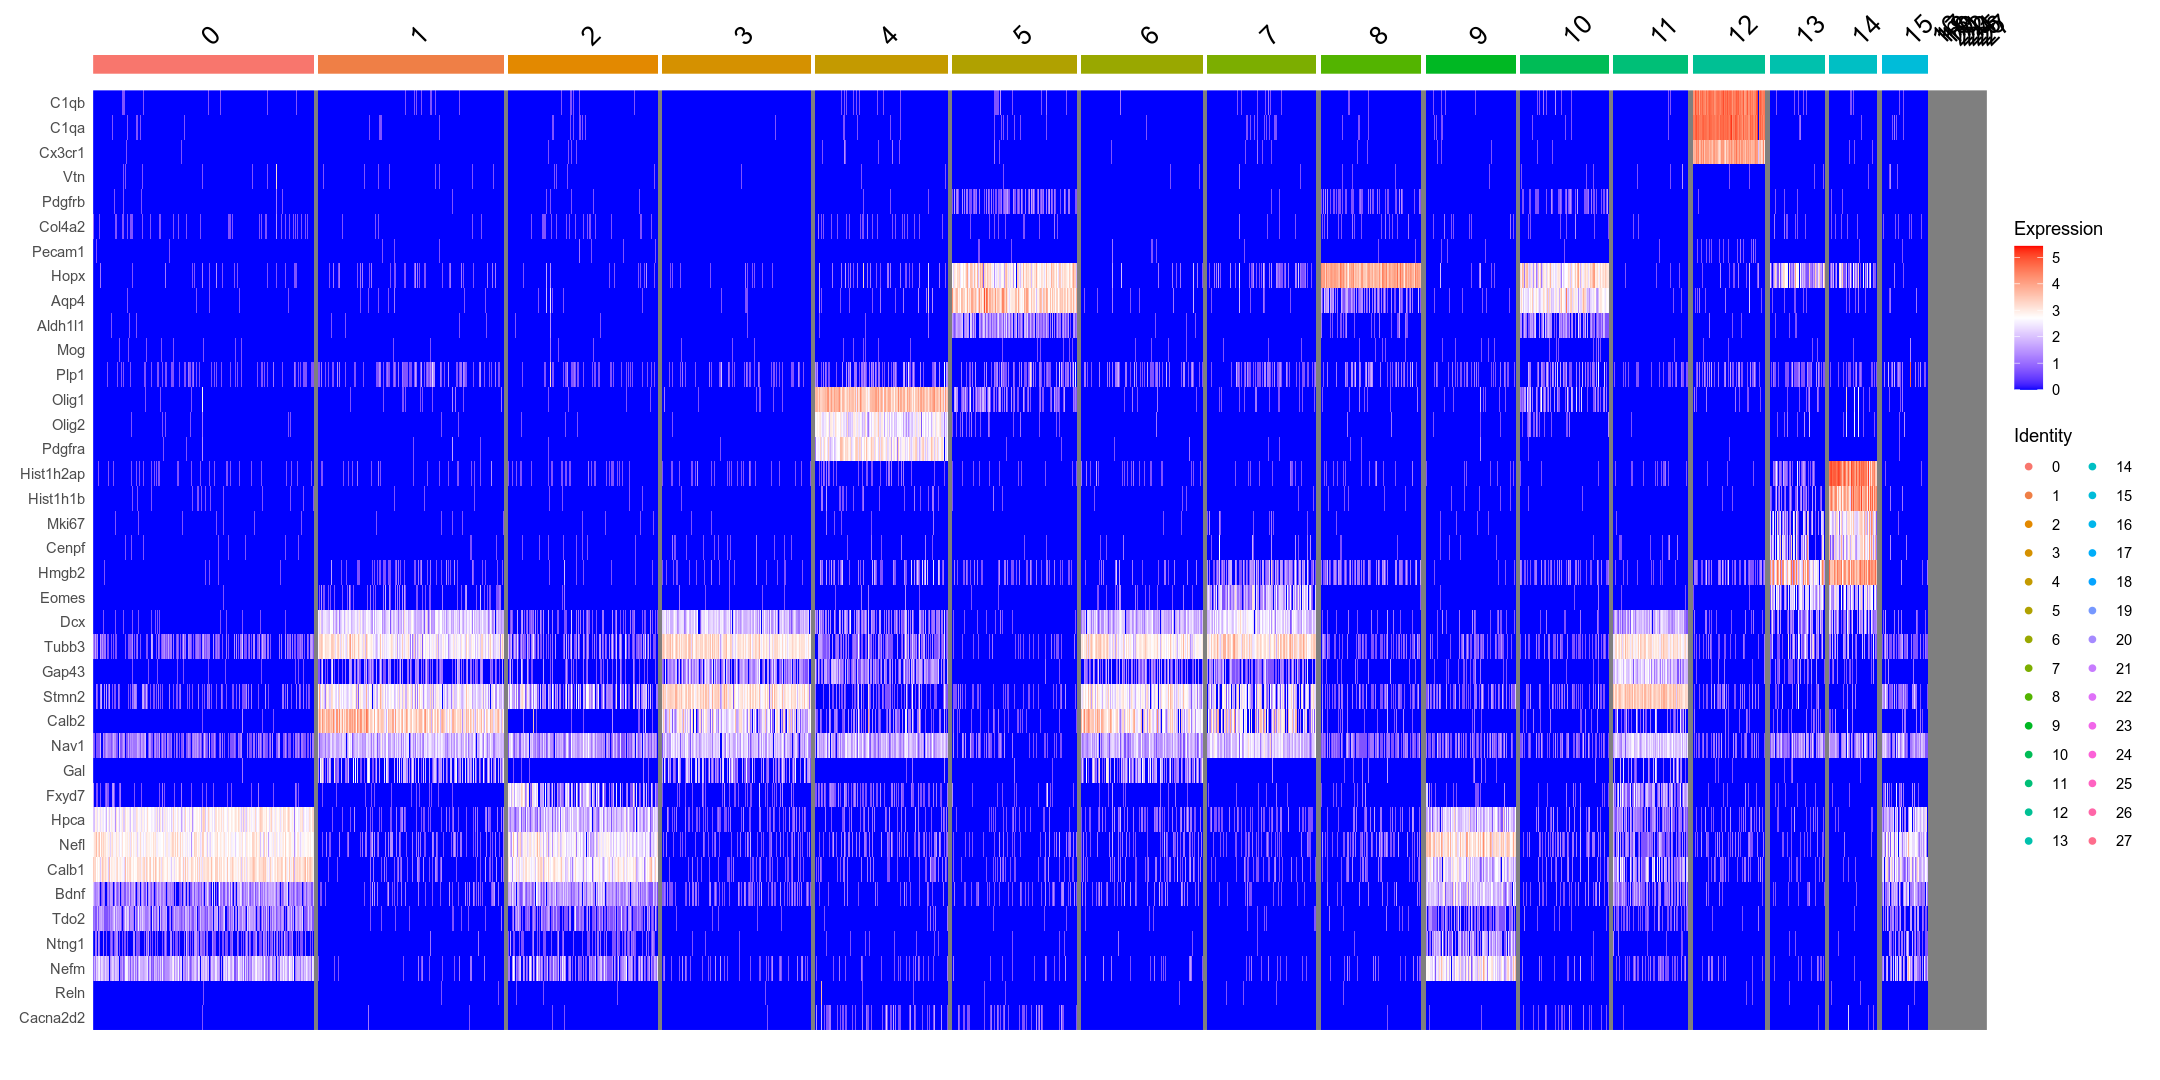

In [9]:
options(repr.plot.width=18, repr.plot.height=9)
bigCheck <- WhichCells(sro_mt, idents = c(0:15))
DoHeatmap(sro_mt, cells=bigCheck,
          features= truncfeaturelist,
              #fullfeaturelist,
          slot="data")+ scale_fill_gradientn(colors = c("blue", "white", "red"))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


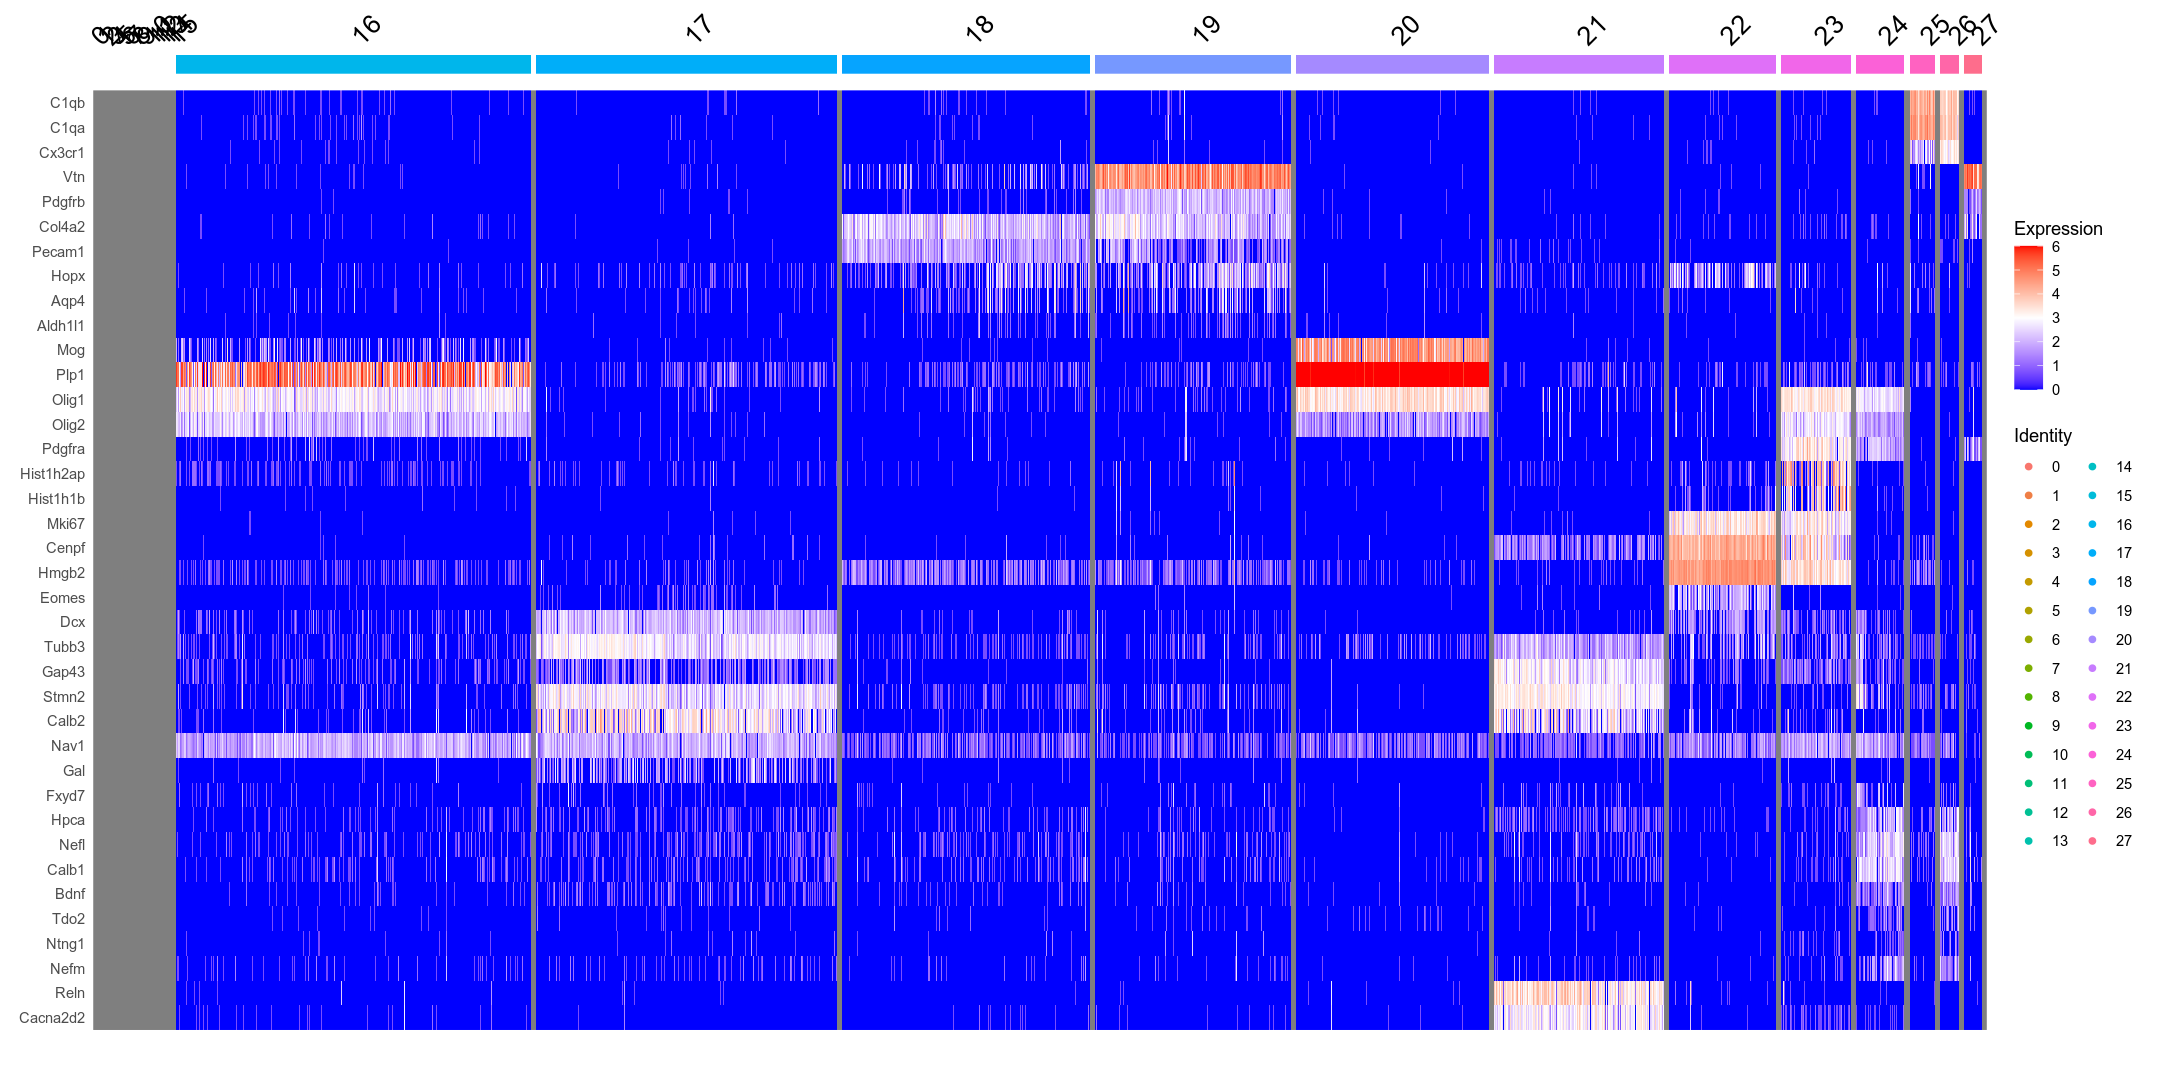

In [10]:
# all markers
options(repr.plot.width=18, repr.plot.height=9)
smallCheck <- WhichCells(sro_mt, idents = c(16:27))
DoHeatmap(sro_mt, cells=smallCheck,
          features= truncfeaturelist,
              #fullfeaturelist,
          slot="data")+ scale_fill_gradientn(colors = c("blue", "white", "red"))

In [6]:
sro_mt <- AddMetaData(sro_mt, metadata=factor(sro_mt$seurat_clusters,
                                              levels=c(12,25, #microglia
                                                       19,27,18,#mural/endothelial
                                                       5,10,8, #astrocyte/RGL
                                                       20,16,4,23, #oligs
                                                       14,22,13,#neuroprog
                                                       7,1,6,17,3,11,#neuroblasts
                                                       2,15,0,9,#gcs
                                                       21,
                                                       24,26),
                                              labels=c("microglia","microglia",
                                                       "mural","mural","endothelial",
                                                       "astrocyte","astrocyte","RGL-like",
                                                       "olig 2","olig 1","olig precursor","olig progenitor",
                                                       "neuroprogenitor","neuroprogenitor","neuroprog trans",
                                                       "neuroblast 1","neuroblast 2","neuroblast 2","neuroblast 2","neuroblast 2","neuroblast trans",
                                                       "immature GC","mature GC","mature GC","mature GC",
                                                       "cajal retzius",
                                                       "olig neuron","exclude (microglia)")),
                            col.name="cell_types")

In [7]:
mt_total = colSums(sro_mt$SCT@counts[grep("^mt-", rownames(sro_mt$SCT@counts)),])
total_counts = colSums(sro_mt$SCT@counts)
sro_mt <- AddMetaData(sro_mt, metadata= mt_total/total_counts, col.name="mtfrac_SCT")

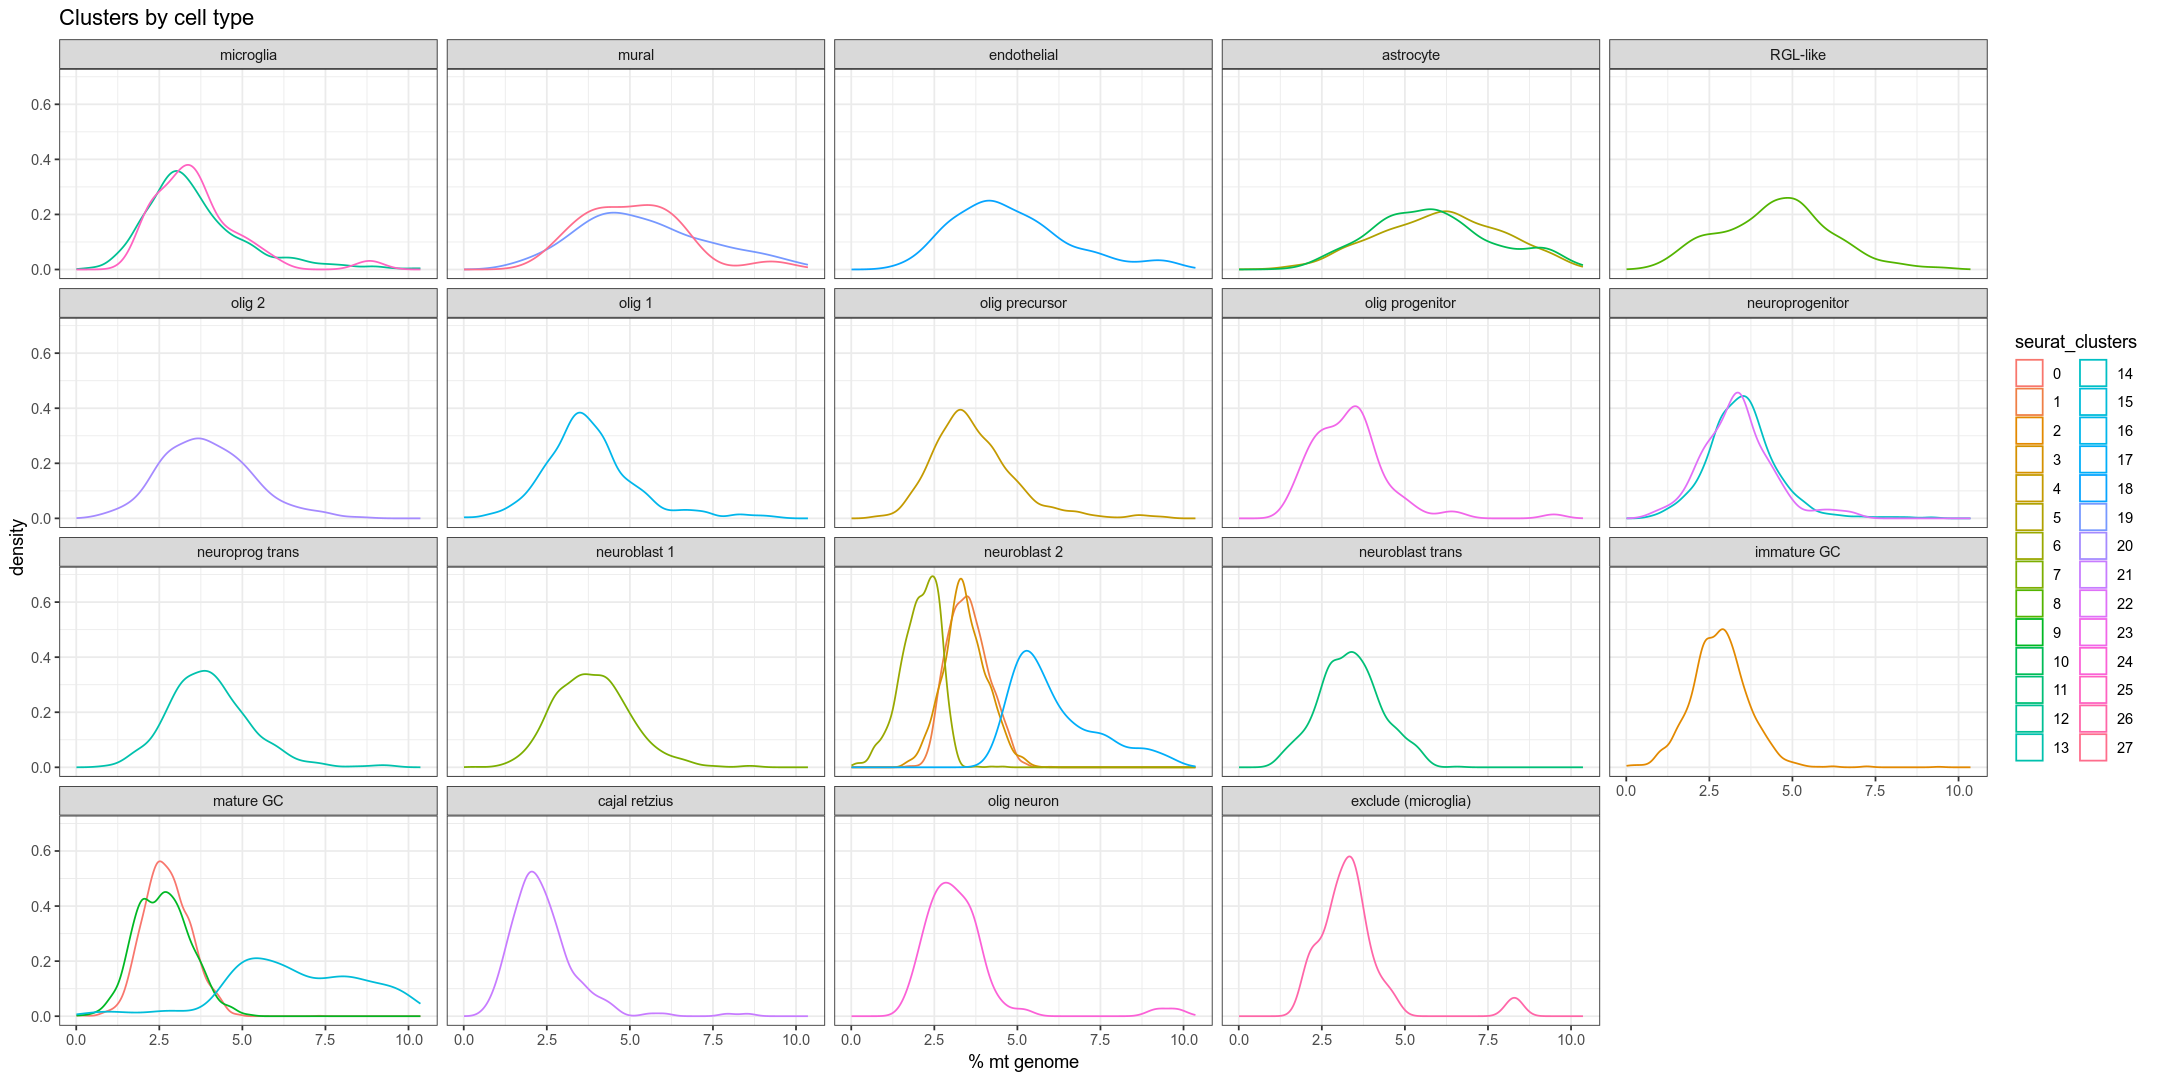

In [14]:
options(repr.plot.width=11, repr.plot.height=9)
ggplot(sro_mt@meta.data, aes(mtfrac_SCT*100, color=seurat_clusters))+
geom_density()+
facet_wrap(vars(cell_types))+theme_bw()+labs(x="% mt genome", title="Clusters by cell type")

In [8]:
named.clusters.ordered = c("microglia","inf. macrophage", 
                           "mural 1","mural 2","endothelial",
                           "astrocyte 1","astrocyte 2","RGL-like",
                           "olig 2","olig 1","olig precursor","olig progenitor",
                           "neuroprogenitor 1","neuroprogenitor 2","neuroprogenitor trans",
                           "neuroblast 1","neuroblast 2.1","neuroblast 2.2","neuroblast high-mt","neuroblast 2.3", "neuroblast trans",
                           "immature GC", "high-mt GC","GC 1","synaptic GC",
                           "cajal-retzius",
                           "olig neuron","exclude (microglia)")

In [9]:
sro_mt <- AddMetaData(sro_mt, metadata=factor(sro_mt$seurat_clusters,
                                              levels=c(12,25, #microglia
                                                       19,27,18,#mural/endothelial
                                                       5,10,8, #astrocyte/RGL
                                                       20,16,4,23, #oligs
                                                       14,22,13,#neuroprog
                                                       7,1,6,17,3,11,#neuroblasts
                                                       2,15,0,9,#gcs
                                                       21,#cajal retzius
                                                       24,26),
                                              labels= named.clusters.ordered),
                      col.name="seurat_clusters_named")

## Self-transfer cluster identities to check for overclustering

First attempt with original PCA shows that self-transfer of cluster ID is much worse for neurons than for glia. 

In [10]:
anchors <- FindTransferAnchors(reference = sro_mt, query = sro_mt, dims = 1:30, reference.reduction = "pca")

Warning message in ValidateParams_FindTransferAnchors(reference = reference, query = query, :
“Both reference and query assays have been processed with SCTransform.Setting normalization.method = 'SCT' and continuing.”
Normalizing query using reference SCT model

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 24143 anchors

Filtering anchors

	Retained 11932 anchors

'as(<ngCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "dMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [11]:
query <- TransferData(anchorset = anchors, reference = sro_mt, query = sro_mt, 
    refdata = list(celltype = "cell_types", cluster= "seurat_clusters_named"))

query$prediction.match <- query$predicted.celltype == query$cell_types
(x= table(query$prediction.match))
as.numeric(x[2])/(as.numeric(x[1])+as.numeric(x[2]))

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Predicting cell labels




FALSE  TRUE 
 1971 17355 

[1] 0.898013

In [12]:
Idents(sro_mt) <- "cell_types"
nrns = WhichCells(sro_mt, idents=c("neuroblast 1","neuroblast 2", "neuroblast trans",
                                   "immature GC","mature GC","cajal retzius"))
glia = setdiff(Cells(sro_mt), nrns)
round(length(nrns)/(length(nrns)+length(glia)),3)

[1] 0.608

In [14]:
print("glia predictions")
(x1= table(query[,glia]$prediction.match))
as.numeric(x1[2])/(as.numeric(x1[1])+as.numeric(x1[2]))

print("nrns predictions")
(x2= table(query[,nrns]$prediction.match))
as.numeric(x2[2])/(as.numeric(x2[1])+as.numeric(x2[2]))

[1] "glia predictions"



FALSE  TRUE 
   55  7517 

[1] 0.9927364

[1] "nrns predictions"



FALSE  TRUE 
 1916  9838 

[1] 0.8369917

In [20]:
query@meta.data$predicted.cluster = factor(query@meta.data$predicted.cluster, levels=named.clusters.ordered)

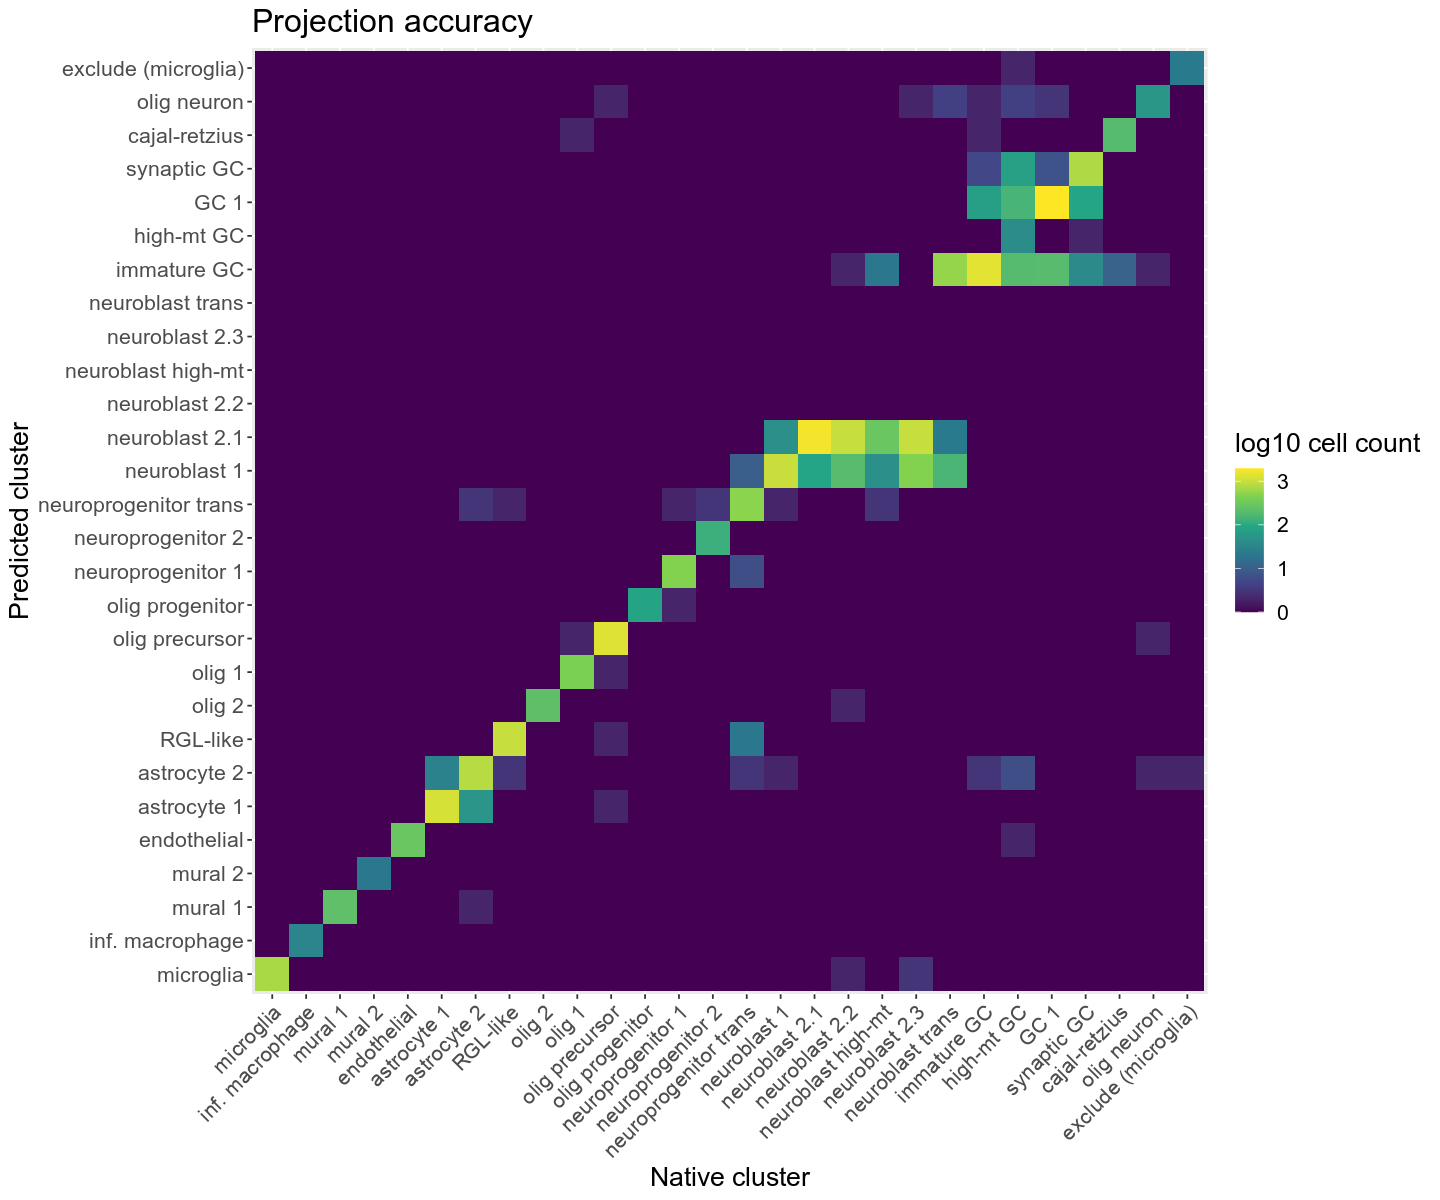

In [21]:
options(repr.plot.width=12, repr.plot.height=10)
ggplot(as.data.frame(table(query@meta.data[,c('seurat_clusters_named','predicted.cluster')])),
       aes(seurat_clusters_named, predicted.cluster, fill=log10(Freq+1)))+
geom_tile()+scale_fill_viridis_c()+
labs(y="Predicted cluster",x="Native cluster", fill="log10 cell count", title="Projection accuracy")+
theme(axis.text.x= element_text(angle=45, hjust=1),
      text= element_text(size=16))

Although neurons make up 60% of cells in scRNAseq sample, the total variability represented with PCA is biased towards the stronger differences between different cell types than the more subtle differences between neuron subgroups. <br><br> Therefore we created new PCs for just the neurons and re-did the self-transfer with glia and neurons separately. We found that self-transfer of neuronal cell type performed better. <br><br> This indicates that the neuronal cell type IDs determined with original PCs can be faithfully reproduced when self-transfered with more neuron-specific reduced dimensions.

In [15]:
sro_mt_nrns <- sro_mt[,nrns]
sro_mt_nrns <- RunPCA(object= sro_mt_nrns)
sro_mt_glia <- sro_mt[,glia]

PC_ 1 
Positive:  Igfbpl1, Sox11, Calb2, Sox4, Tmsb10, Nnat, Stmn1, Tubb3, Neurod1, Tuba1a 
	   Sema3c, Cd24a, Tac2, Tubb2b, Fxyd6, Zbtb20, Tubb5, Stmn2, Ttc28, Ppp1r14b 
	   Cst3, Nfib, Mdk, Dcx, Apoe, Ptn, Dpysl3, Ddah2, Elavl2, Cnr1 
Negative:  Nrgn, C1ql3, Chn1, Nefl, Calb1, Atp1b1, Camk2n1, Olfm1, Meg3, Ncdn 
	   Camk2a, Nsf, Ppp3ca, Ncald, Hpca, tdt, Grin2a, Camk2b, 2010300C02Rik, Snca 
	   Ptk2b, Cck, Adcy1, Nefm, Slc17a7, C1qtnf4, Plppr4, Snap25, Fth1, Cpne6 
PC_ 2 
Positive:  Apoe, Cst3, Ptn, Aldoc, Atp1a2, Slc1a3, Plpp3, Clu, Dbi, Ptprz1 
	   Slc1a2, Mt1, Gpr37l1, Hopx, Bcan, Id3, Cspg5, Htra1, Sparcl1, Glul 
	   Pla2g7, Sparc, Gja1, Aqp4, Ntsr2, Fabp7, Mfge8, Cldn10, Prdx6, Olig1 
Negative:  Igfbpl1, Sox11, Calb2, Tmsb10, Tubb3, Stmn2, Nnat, Neurod1, Sox4, Stmn1 
	   Sema3c, Zbtb20, Cd24a, Tuba1a, Tubb2b, Nfib, Dcx, Tac2, Basp1, Bhlhe22 
	   Fxyd6, Tubb5, Nfix, Ttc28, Prox1, Dpysl3, Jpt1, Rtn1, Cnr1, Fnbp1l 
PC_ 3 
Positive:  Meg3, Snhg11, Ndnf, Reln, Cacna2d2, Gap43, Lhx1, 

In [16]:
anchors.nrns <- FindTransferAnchors(reference = sro_mt_nrns, query = sro_mt_nrns, dims = 1:30, 
                                    reference.reduction = "pca")

Warning message in ValidateParams_FindTransferAnchors(reference = reference, query = query, :
“Both reference and query assays have been processed with SCTransform.Setting normalization.method = 'SCT' and continuing.”
Normalizing query using reference SCT model

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 16040 anchors

Filtering anchors

	Retained 8115 anchors



In [17]:
query.nrns <- TransferData(anchorset = anchors.nrns, reference = sro_mt_nrns, query = sro_mt_nrns, 
    refdata = list(celltype = "cell_types", cluster= "seurat_clusters_named"))

query.nrns$prediction.match <- query.nrns$predicted.celltype == query.nrns$cell_types
(x= table(query.nrns$prediction.match))
as.numeric(x[2])/(as.numeric(x[1])+as.numeric(x[2]))

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Predicting cell labels




FALSE  TRUE 
  582 11172 

[1] 0.9504849

In [18]:
query.nrns@meta.data$seurat_clusters_named = factor(query.nrns@meta.data$seurat_clusters_named,
                                                       levels= named.clusters.ordered[16:26])
query.nrns@meta.data$predicted.cluster = factor(query.nrns@meta.data$predicted.cluster,
                                                levels= named.clusters.ordered[16:26])

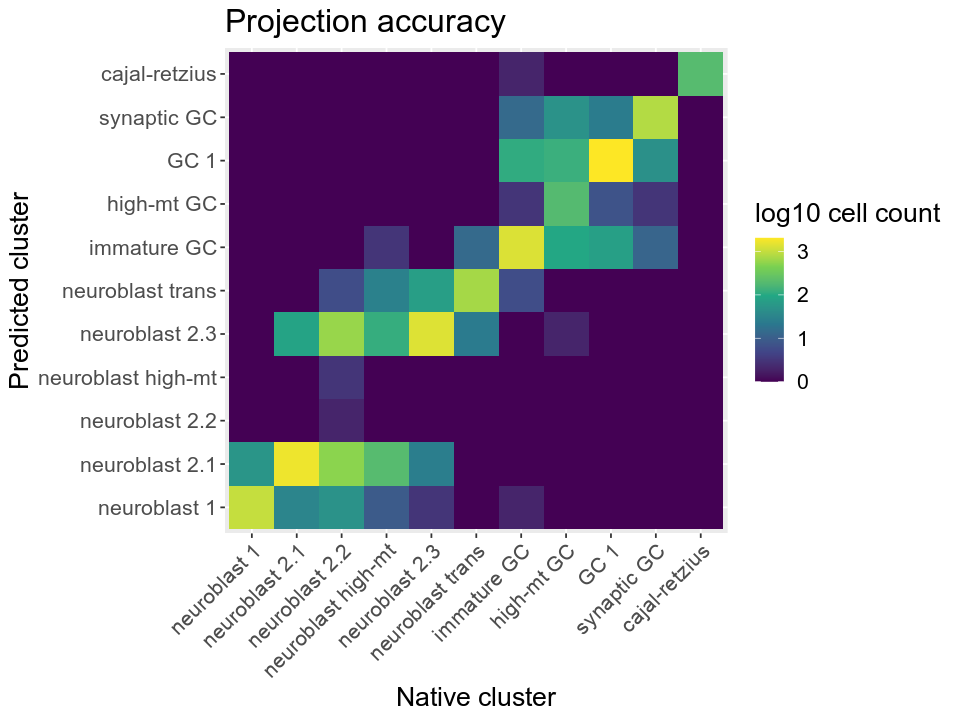

In [35]:
options(repr.plot.width=8, repr.plot.height=6)
ggplot(as.data.frame(table(query.nrns@meta.data[,c('seurat_clusters_named','predicted.cluster')])),
      aes(seurat_clusters_named, predicted.cluster, fill=log10(Freq+1)))+
    geom_tile()+scale_fill_viridis_c()+
    labs(y="Predicted cluster",x="Native cluster", fill="log10 cell count", title="Projection accuracy")+
    theme(axis.text.x= element_text(angle=45, hjust=1),
         text= element_text(size=16))

In [19]:
anchors.glia <- FindTransferAnchors(reference = sro_mt_glia, query = sro_mt_glia, dims = 1:30, reference.reduction = "pca")

Warning message in ValidateParams_FindTransferAnchors(reference = reference, query = query, :
“Both reference and query assays have been processed with SCTransform.Setting normalization.method = 'SCT' and continuing.”
Normalizing query using reference SCT model

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 14290 anchors

Filtering anchors

	Retained 9647 anchors



In [20]:
query.glia <- TransferData(anchorset = anchors.glia, reference = sro_mt_glia, query = sro_mt_glia, 
    refdata = list(celltype = "cell_types", cluster= "seurat_clusters_named"))

query.glia$prediction.match <- query.glia$predicted.celltype == query.glia$cell_types
(x= table(query.glia$prediction.match))
as.numeric(x[2])/(as.numeric(x[1])+as.numeric(x[2]))

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Predicting cell labels




FALSE  TRUE 
   41  7531 

[1] 0.9945853

In [21]:
query.glia@meta.data$seurat_clusters_named = factor(query.glia@meta.data$seurat_clusters_named,
                                                       levels= named.clusters.ordered[c(1:15,27,28)])
query.glia@meta.data$predicted.cluster = factor(query.glia@meta.data$predicted.cluster,
                                                       levels= named.clusters.ordered[c(1:15,27,28)])

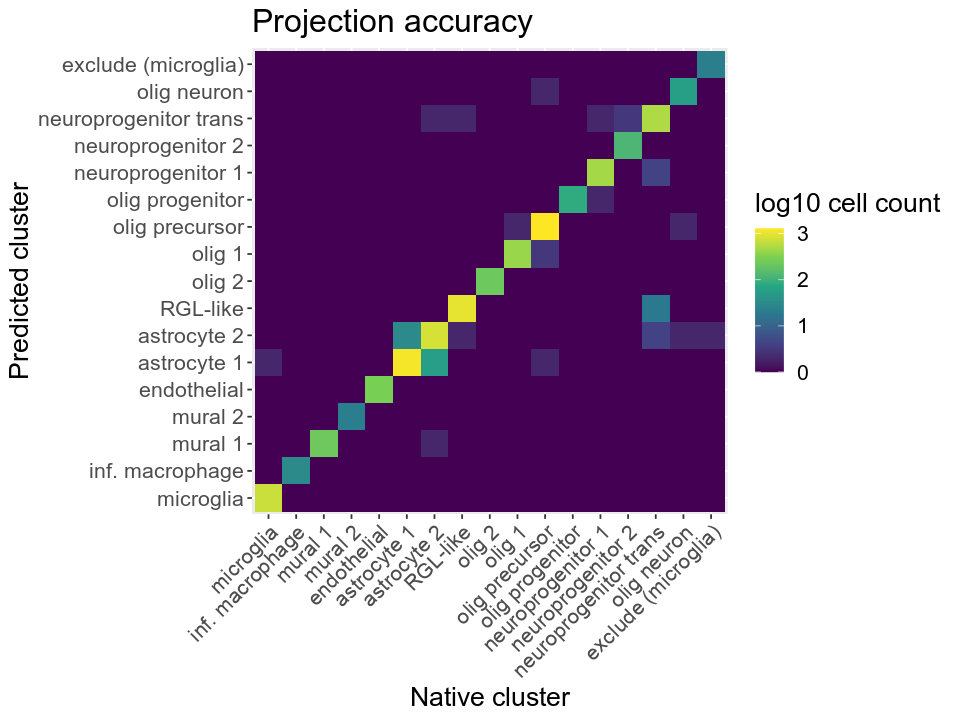

In [40]:
options(repr.plot.width=8, repr.plot.height=6)
ggplot(as.data.frame(table(query.glia@meta.data[,c('seurat_clusters_named','predicted.cluster')])),
       aes(seurat_clusters_named, predicted.cluster, fill=log10(Freq+1)))+
geom_tile()+scale_fill_viridis_c()+
labs(y="Predicted cluster",x="Native cluster", fill="log10 cell count", title="Projection accuracy")+
theme(axis.text.x= element_text(angle=45, hjust=1),
      text= element_text(size=16))

In [22]:
df = bind_rows(query.nrns@meta.data, query.glia@meta.data)
sro_mt@meta.data$predicted.cluster = df[rownames(sro_mt@meta.data),"predicted.cluster"]
sro_mt@meta.data$predicted.cluster = factor(sro_mt@meta.data$predicted.cluster, levels= named.clusters.ordered)

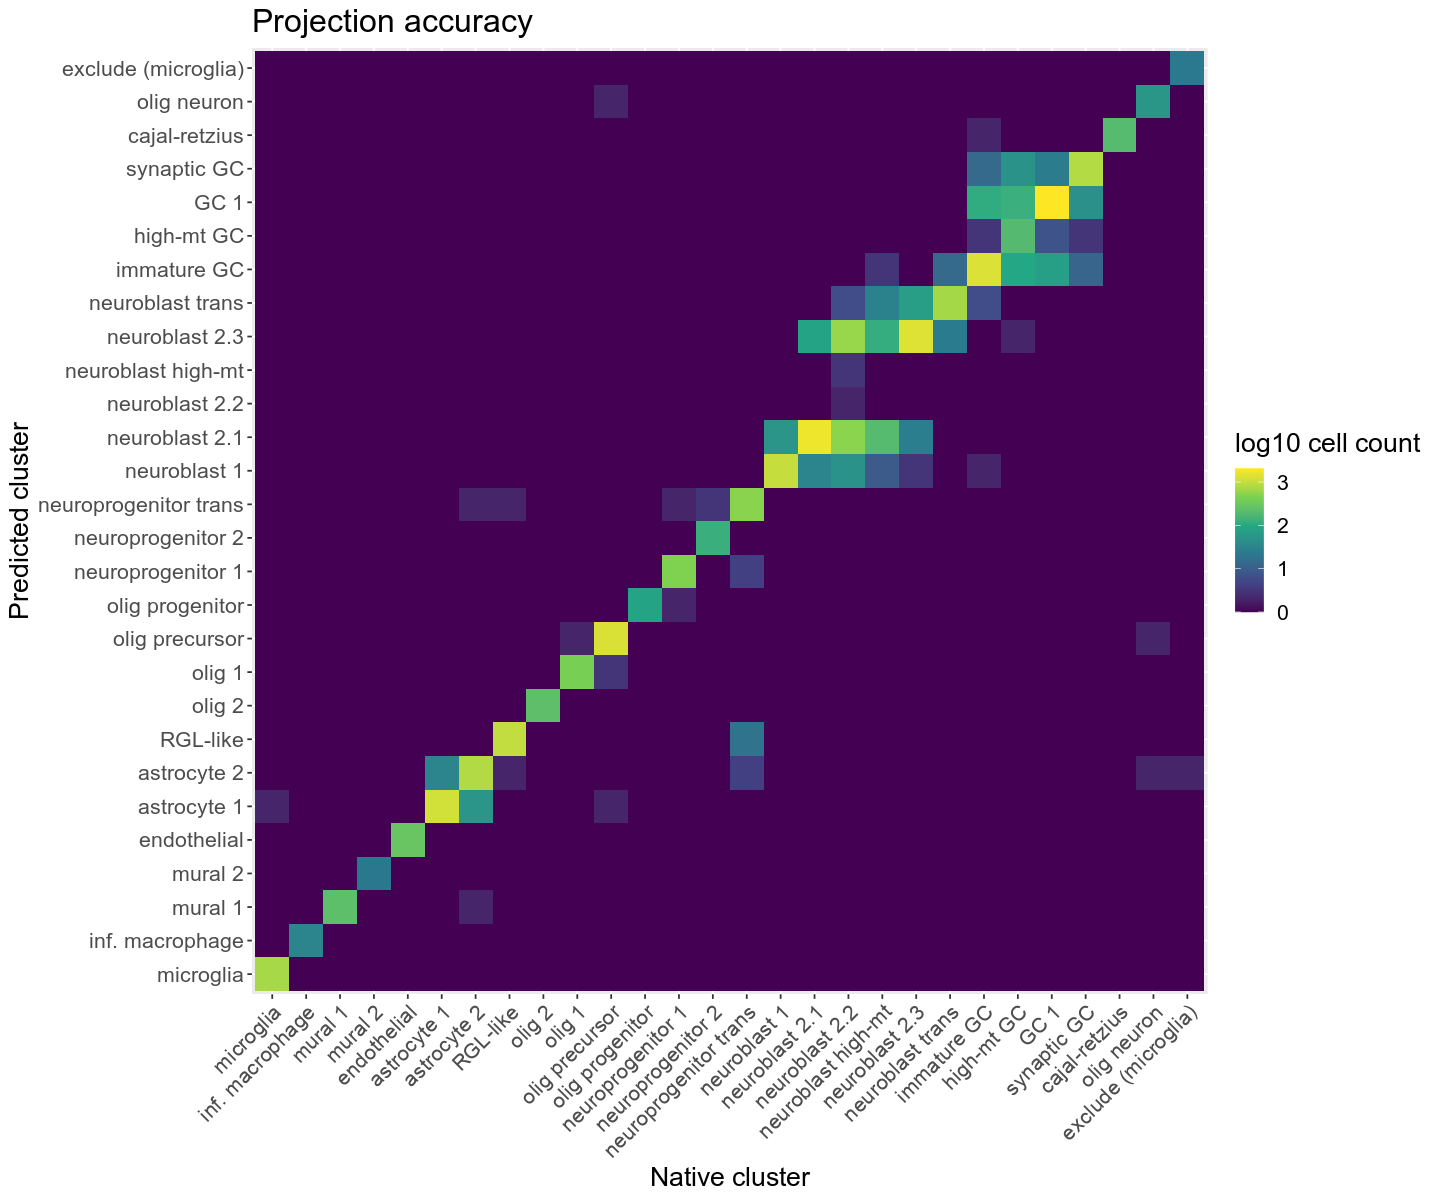

In [23]:
options(repr.plot.width=12, repr.plot.height=10)
ggplot(as.data.frame(table(sro_mt@meta.data[,c('seurat_clusters_named','predicted.cluster')])),
       aes(seurat_clusters_named, predicted.cluster, fill=log10(Freq+1)))+
geom_tile()+scale_fill_viridis_c()+
labs(y="Predicted cluster",x="Native cluster", fill="log10 cell count", title="Projection accuracy")+
theme(axis.text.x= element_text(angle=45, hjust=1),
      text= element_text(size=16))

In [24]:
filt.cells = named.clusters.ordered[table(sro_mt@meta.data[,c("predicted.cluster")])>5]
filt.cells = filt.cells[-grep("mt",filt.cells)]
filt.cells = setdiff(filt.cells, c("olig neuron","exclude (microglia)"))
Idents(sro_mt) <- "predicted.cluster"
filt.cells = WhichCells(sro_mt, idents=filt.cells)
(sro_filt = sro_mt[,filt.cells])

An object of class Seurat 
42826 features across 19047 samples within 2 assays 
Active assay: SCT (20945 features, 3000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: pca

In [28]:
table(sro_filt$predicted.cluster)


            microglia       inf. macrophage               mural 1 
                  707                    30                   229 
              mural 2           endothelial           astrocyte 1 
                   20                   289                  1243 
          astrocyte 2              RGL-like                olig 2 
                  849                   997                   225 
               olig 1        olig precursor       olig progenitor 
                  415                  1296                    83 
    neuroprogenitor 1     neuroprogenitor 2 neuroprogenitor trans 
                  472                   122                   519 
         neuroblast 1        neuroblast 2.1        neuroblast 2.2 
                 1104                  2499                     0 
   neuroblast high-mt        neuroblast 2.3      neuroblast trans 
                    0                  2187                   805 
          immature GC            high-mt GC                  

In [32]:
named.clusters.ordered
named.clusters.ordered[c(1:17,20:22,24:26)]

[1] "microglia"             "inf. macrophage"       "mural 1"              
 [4] "mural 2"               "endothelial"           "astrocyte 1"          
 [7] "astrocyte 2"           "RGL-like"              "olig 2"               
[10] "olig 1"                "olig precursor"        "olig progenitor"      
[13] "neuroprogenitor 1"     "neuroprogenitor 2"     "neuroprogenitor trans"
[16] "neuroblast 1"          "neuroblast 2.1"        "neuroblast 2.2"       
[19] "neuroblast high-mt"    "neuroblast 2.3"        "neuroblast trans"     
[22] "immature GC"           "high-mt GC"            "GC 1"                 
[25] "synaptic GC"           "cajal-retzius"         "olig neuron"          
[28] "exclude (microglia)"

[1] "microglia"             "inf. macrophage"       "mural 1"              
 [4] "mural 2"               "endothelial"           "astrocyte 1"          
 [7] "astrocyte 2"           "RGL-like"              "olig 2"               
[10] "olig 1"                "olig precursor"        "olig progenitor"      
[13] "neuroprogenitor 1"     "neuroprogenitor 2"     "neuroprogenitor trans"
[16] "neuroblast 1"          "neuroblast 2.1"        "neuroblast 2.3"       
[19] "neuroblast trans"      "immature GC"           "GC 1"                 
[22] "synaptic GC"           "cajal-retzius"

In [33]:
sro_filt$predicted.cluster = factor(sro_filt$predicted.cluster, levels=named.clusters.ordered[c(1:17,20:22,24:26)])

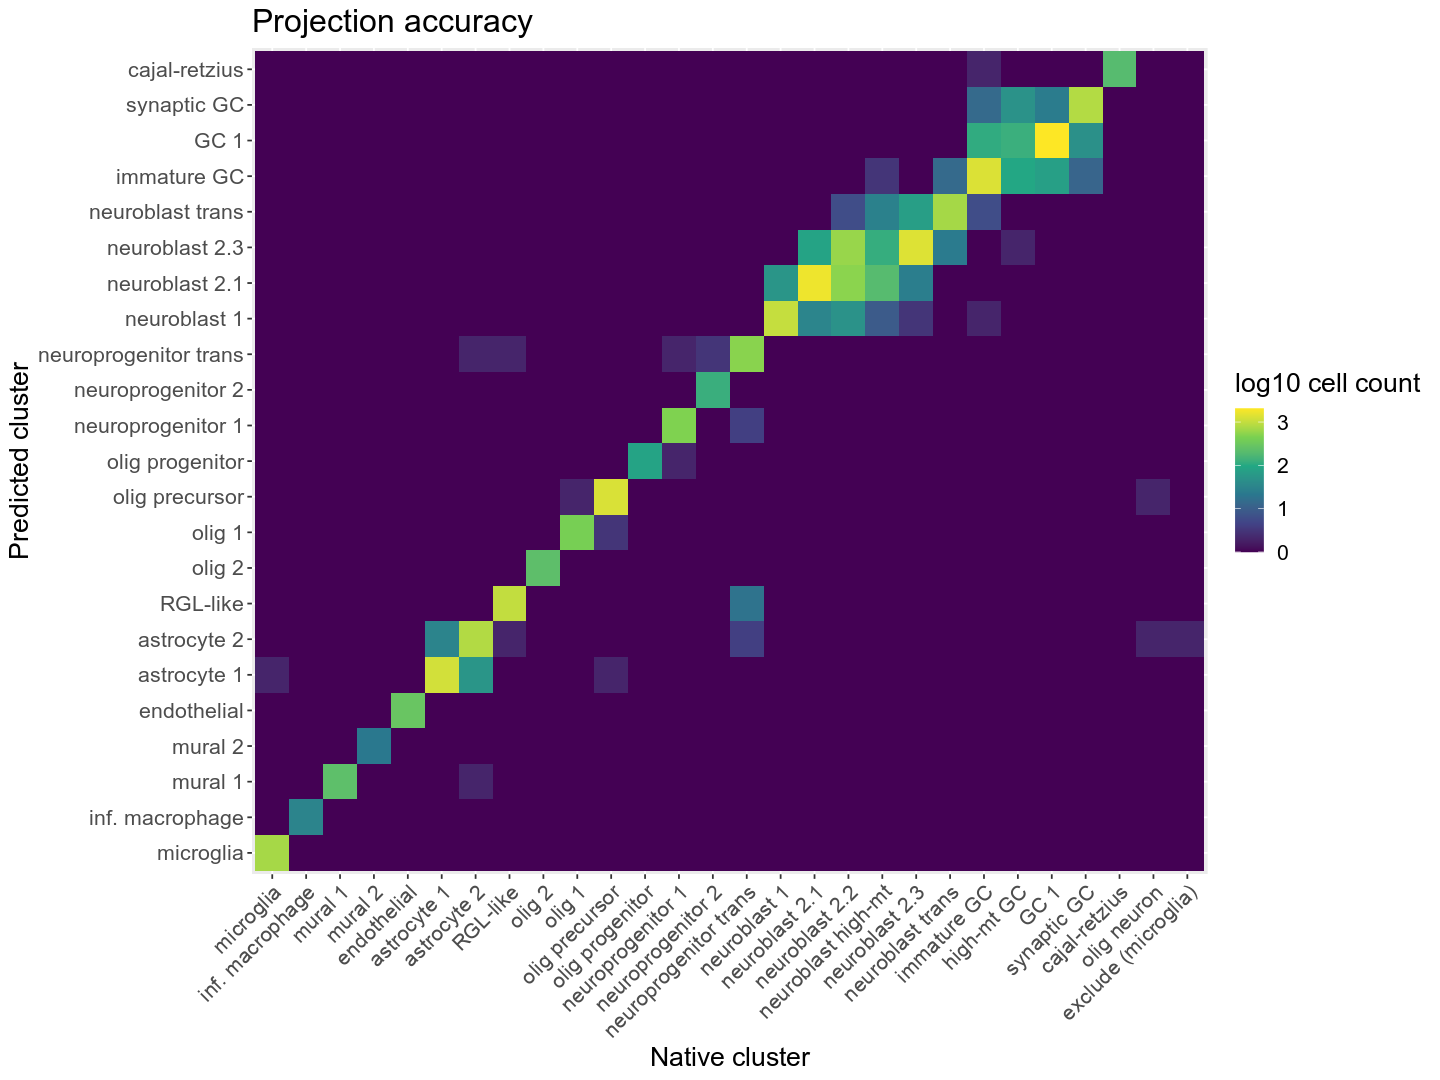

In [35]:
options(repr.plot.width=12, repr.plot.height=9)
ggplot(as.data.frame(table(sro_filt@meta.data[,c('seurat_clusters_named','predicted.cluster')])),
       aes(seurat_clusters_named, predicted.cluster, fill=log10(Freq+1)))+
geom_tile()+scale_fill_viridis_c()+
labs(y="Predicted cluster",x="Native cluster", fill="log10 cell count", title="Projection accuracy")+
theme(axis.text.x= element_text(angle=45, hjust=1),
      text= element_text(size=16))

In [ ]:
saveRDS(sro_filt, here("processed-data","sro_filt_shortcut.rda"))